# Stanza Tutorial

(C) 2023-2025 by [Damir Cavar](http://damir.cavar.me/)

**Version:** 1.2, January 2025

**Download:** This and various other Jupyter notebooks are available from my [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).

**Prerequisites:**

In [ ]:
!pip install -U stanza

To install [spaCy](https://spacy.io/) follow the instructions on the [Install spaCy page](https://spacy.io/usage).

In [ ]:
!pip install -U pip setuptools wheel

The following installation of spaCy is ideal for my environment, i.e., using a GPU and CUDA 12.x. See the [spaCy homepage](https://spacy.io/usage) for detailed installation instructions.

In [ ]:
!pip install -U 'spacy[cuda12x,transformers,lookups,ja]'

## Introduction

This is a tutorial related to the [L645 Advanced Natural Language Processing](http://damir.cavar.me/l645/) course in Fall 2023 at Indiana University. The following tutorial assumes that you are using a newer distribution of [Python 3.x](https://python.org/) and [Stanza](https://stanfordnlp.github.io/stanza/) 1.5.1 or newer.

This notebook assumes that you have set up [Stanza](https://stanfordnlp.github.io/stanza/) on your computer with your [Python](https://python.org/) distribution. Follow the instructions on the [Stanza](https://stanfordnlp.github.io/stanza/) installation page to set up a working environment for the following code. The code will also require that you are online and that the specific language models can be downloaded and installed.

Loading the [Stanza](https://stanfordnlp.github.io/stanza/) module and [spaCy's Displacy](https://spacy.io/usage/visualizers) for visualization:

In [1]:
import stanza
from stanza.models.common.doc import Document
from stanza.pipeline.core import Pipeline
from spacy import displacy

The following code will load the English language model for [Stanza](https://stanfordnlp.github.io/stanza/):

In [2]:
stanza.download('de')

2025-12-04 07:53:57 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 07:53:57 INFO: Downloading default packages for language: de (German) ...


2025-12-04 07:54:05 INFO: Downloaded file to C:\Users\damir\stanza_resources\de\default.zip
2025-12-04 07:54:10 INFO: Finished downloading models and saved to C:\Users\damir\stanza_resources


We can configure the [Stanza](https://stanfordnlp.github.io/stanza/) pipeline to contain all desired linguistic annotation modules. In this case we use:
- tokenizer
- multi-word-tokenizer
- Part-of-Speech tagger
- lemmatizer
- dependency parser
- constituent parser

In [3]:
nlp = stanza.Pipeline('de', processors='tokenize,mwt,pos,lemma,ner,depparse,constituency,sentiment', package={"ner": ["ncbi_disease", "ontonotes"]}, use_gpu=False, download_method="reuse_resources")

2025-12-04 07:54:12 WARNING: Can not find ner: ncbi_disease from official model list. Ignoring it.
2025-12-04 07:54:12 WARNING: Can not find ner: ontonotes from official model list. Ignoring it.
2025-12-04 07:54:13 INFO: Loading these models for language: de (German):
| Processor    | Package           |
------------------------------------
| tokenize     | combined          |
| mwt          | combined          |
| pos          | combined_charlm   |
| lemma        | combined_nocharlm |
| constituency | spmrl_charlm      |
| depparse     | combined_charlm   |
| sentiment    | sb10k_charlm      |

2025-12-04 07:54:13 INFO: Using device: cpu
2025-12-04 07:54:13 INFO: Loading: tokenize
2025-12-04 07:54:14 INFO: Loading: mwt
2025-12-04 07:54:14 INFO: Loading: pos
2025-12-04 07:54:16 INFO: Loading: lemma
2025-12-04 07:54:25 INFO: Loading: constituency
2025-12-04 07:54:25 INFO: Loading: depparse
2025-12-04 07:54:26 INFO: Loading: sentiment
2025-12-04 07:54:26 INFO: Done loading processors!


In [4]:
doc = nlp("Gummibärchen habe ich grüne noch keine gegessen.")
for i, sentence in enumerate(doc.sentences):
    print(f'====== Sentence {i+1} tokens =======')
    print(*[f'id: {token.id}\ttext: {token.text}' for token in sentence.tokens], sep='\n')

====== Sentence 1 tokens =======
id: (1,)	text: Gummibärchen
id: (2,)	text: habe
id: (3,)	text: ich
id: (4,)	text: grüne
id: (5,)	text: noch
id: (6,)	text: keine
id: (7,)	text: gegessen
id: (8,)	text: .


In [5]:
print(*[f'word: {word.text}\tupos: {word.upos}\txpos: {word.xpos}\tfeats: {word.feats if word.feats else "_"}' for sent in doc.sentences for word in sent.words], sep='\n')

word: Gummibärchen	upos: NOUN	xpos: NN	feats: Case=Acc|Gender=Fem|Number=Plur
word: habe	upos: AUX	xpos: VAFIN	feats: Mood=Ind|Number=Sing|Person=1|Tense=Pres|VerbForm=Fin
word: ich	upos: PRON	xpos: PPER	feats: Case=Nom|Number=Sing|Person=1|PronType=Prs
word: grüne	upos: NOUN	xpos: NN	feats: Case=Acc|Gender=Fem|Number=Sing
word: noch	upos: ADV	xpos: ADV	feats: _
word: keine	upos: DET	xpos: PIS	feats: Case=Acc|Gender=Fem|Number=Sing|PronType=Neg
word: gegessen	upos: VERB	xpos: VVPP	feats: VerbForm=Part
word: .	upos: PUNCT	xpos: $.	feats: _


In [6]:
print(*[f'word: {word.text+" "}\tlemma: {word.lemma}' for sent in doc.sentences for word in sent.words], sep='\n')

word: Gummibärchen 	lemma: Gummibärchen
word: habe 	lemma: haben
word: ich 	lemma: ich
word: grüne 	lemma: grün
word: noch 	lemma: noch
word: keine 	lemma: kein
word: gegessen 	lemma: essen
word: . 	lemma: .


In [7]:
for sentence in doc.sentences:
    print(sentence.constituency)

(ROOT (VROOT (S (NOUN Gummibärchen) (AUX habe) (PRON ich) (VP (NOUN grüne) (AP (ADV noch) (DET keine)) (VERB gegessen))) (PUNCT .)))


In [8]:
print(*[f'entity: {ent.text}\ttype: {ent.type}' for ent in doc.ents], sep='\n')

In [9]:
print(*[f'token: {token.text}\tner: {token.ner}' for sent in doc.sentences for token in sent.tokens], sep='\n')

token: Gummibärchen	ner: None
token: habe	ner: None
token: ich	ner: None
token: grüne	ner: None
token: noch	ner: None
token: keine	ner: None
token: gegessen	ner: None
token: .	ner: None


In [10]:
for i, sentence in enumerate(doc.sentences):
    print("%d -> %d" % (i, sentence.sentiment))

0 -> 1


## Language ID

In [11]:
stanza.download(lang="multilingual")
stanza.download(lang="en")
# stanza.download(lang="fr")
stanza.download(lang="de")

2025-12-04 07:54:53 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 07:54:53 INFO: Downloading default packages for language: multilingual (multilingual) ...
2025-12-04 07:54:53 INFO: File exists: C:\Users\damir\stanza_resources\multilingual\default.zip
2025-12-04 07:54:53 INFO: Finished downloading models and saved to C:\Users\damir\stanza_resources


2025-12-04 07:54:54 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 07:54:54 INFO: Downloading default packages for language: en (English) ...


2025-12-04 07:54:59 INFO: Downloaded file to C:\Users\damir\stanza_resources\en\default.zip
2025-12-04 07:55:02 INFO: Finished downloading models and saved to C:\Users\damir\stanza_resources


2025-12-04 07:55:02 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 07:55:02 INFO: Downloading default packages for language: de (German) ...
2025-12-04 07:55:04 INFO: File exists: C:\Users\damir\stanza_resources\de\default.zip
2025-12-04 07:55:09 INFO: Finished downloading models and saved to C:\Users\damir\stanza_resources


In [12]:
nlp = Pipeline(lang="multilingual", processors="langid")
docs = ["Hello world.", "Hallo, Welt!", "Ciao mondo!", "Hola mundo!"]
docs = [Document([], text=text) for text in docs]
nlp(docs)
print("\n".join(f"{doc.text}\t{doc.lang}" for doc in docs))

2025-12-04 07:55:12 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-12-04 07:55:12 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 07:55:12 INFO: Loading these models for language: multilingual ():
| Processor | Package |
-----------------------
| langid    | ud      |

2025-12-04 07:55:12 INFO: Using device: cpu
2025-12-04 07:55:12 INFO: Loading: langid
2025-12-04 07:55:12 INFO: Done loading processors!


Hello world.	en
Hallo, Welt!	it
Ciao mondo!	it
Hola mundo!	kmr


## Processing Dependency Parse Trees

I wrote the following function to convert the [Stanza](https://stanfordnlp.github.io/stanza/) dependency tree data structure to a [spaCy's Displacy](https://spacy.io/usage/visualizers) compatible data structure for the visualization of dependency trees using [spaCy's](https://spacy.io/) excellent visualizer:

In [13]:
def get_stanza_dep_displacy_manual(doc):
    res = []
    for x in doc.sentences:
        words = []
        arcs  = []
        for w in x.words:
            if w.head > 0:
                head_text = x.words[w.head-1].text
            else:
                head_text = "root"
            words.append({"text": w.text, "tag": w.upos})
            if w.deprel == "root": continue
            start = w.head-1
            end = w.id-1
            if start < end:
                arcs.append({ "start":start, "end":end, "label": w.deprel, "dir":"right"})
            else:
                arcs.append({ "start":end, "end":start, "label": w.deprel, "dir":"left"})
        res.append( { "words": words, "arcs": arcs } )
    return res

We can generate an annotation object with [Stanza](https://stanfordnlp.github.io/stanza/) similarly to [spaCy's](https://spacy.io/) approach submitting a sentence or text segment to the NLP pipeline we specified above and assigned to the `nlp` variable:

In [14]:
doc = nlp("Gummibärchen habe ich grüne noch keine gegessen.")

We can now generate the [spaCy](https://spacy.io/)-compatible data format from the dependency tree to be able to visualize it:

In [15]:
res = get_stanza_dep_displacy_manual(doc)

The rendering can be achieved using the [Displacy](https://spacy.io/usage/visualizers) call:

In [16]:
displacy.render(res, style="dep") # , manual=True, options={"compact":False, "distance":110})

## Data Format - CoNLL

In [47]:
from stanza.utils.conll import CoNLL

In [49]:
CoNLL.write_doc2conll(doc, "output.conllu")

## Visualization using PyPlot

In [17]:
stanza.download('en')

2025-12-04 07:59:05 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 07:59:05 INFO: Downloading default packages for language: en (English) ...
2025-12-04 07:59:06 INFO: File exists: C:\Users\damir\stanza_resources\en\default.zip
2025-12-04 07:59:09 INFO: Finished downloading models and saved to C:\Users\damir\stanza_resources


In [26]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,pos,lemma,depparse,constituency', use_gpu=True)

2025-12-04 08:03:13 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-12-04 08:03:13 INFO: Downloaded file to C:\Users\damir\stanza_resources\resources.json
2025-12-04 08:03:13 WARNING: Language en package default expects mwt, which has been added
2025-12-04 08:03:14 INFO: Loading these models for language: en (English):
| Processor    | Package             |
--------------------------------------
| tokenize     | combined            |
| mwt          | combined            |
| pos          | combined_charlm     |
| lemma        | combined_nocharlm   |
| constituency | ptb3-revised_charlm |
| depparse     | combined_charlm     |

2025-12-04 08:03:14 WARNING: GPU requested, but is not available!
2025-12-04 08:03:14 INFO: Using device: cpu
2025-12-04 08:03:14 INFO: Loading: tokenize
2025-12-04 08:03:14 INFO: Loading: mwt
2025-12-04 08:03:14 INFO: Loading: pos
2025-12-04 08:03:16 INFO: Loading: lemma
2025-12-04 08:03:16 INFO: Loading: constituency
2025-12-04 08:03:17 INFO: Loading: depparse
2025-12-04 08:03:17 INFO: Done loading processors!


In [27]:
doc = nlp("I saw the man with the binoculars.")

In [28]:
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
G = nx.DiGraph()

In [30]:
for sentence in doc.sentences:
    # Add nodes for each word
    for word in sentence.words:
        G.add_node(word.id, label=word.text)

    # Add edges based on dependency relations
    for word in sentence.words:
        if word.head > 0:  # Not the root
            G.add_edge(word.head, word.id, label=word.deprel)
        else: # Handle the root node (e.g., connect to a virtual root or identify it as such)
            G.add_node(0, label="ROOT") # Add a virtual root node
            G.add_edge(0, word.id, label="root")


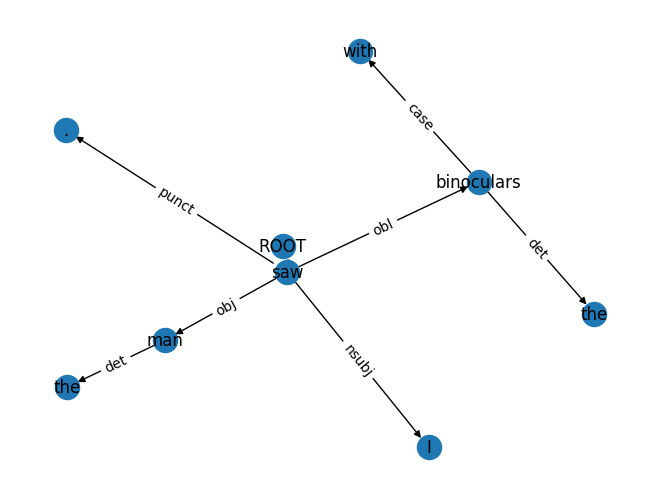

In [31]:
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'))
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))
plt.show()

## Visualize the Constituent Parse Tree with NLTK

In [32]:
from nltk import Tree

In [33]:
constituent_tree_string = str(doc.sentences[0].constituency)

In [34]:
nltk_tree = Tree.fromstring(constituent_tree_string)

In [35]:
nltk_tree.draw()

**(C) 2023-2025 by [Damir Cavar](http://damir.cavar.me/) <<dcavar@iu.edu>>**